Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading  Data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Digit Classification/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Digit Classification/test.csv")

In [ ]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Number and count of classifications

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


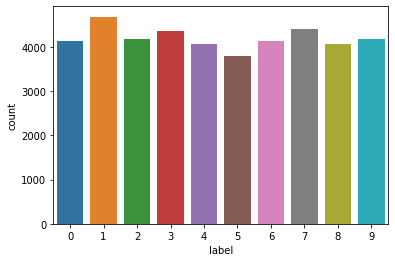

In [ ]:
order = list(np.sort(train_data['label'].unique()))
print(order)
sns.countplot(train_data["label"])

In [ ]:
train_data.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Rescaling the features

In [ ]:
y = train_data['label']
## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')
X = X/255.0
test_data = test_data/255.0



Scaling the features

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, train_size = 0.8 ,random_state = 10)

Linear SVM

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9188095238095239


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred),"\n")
print("Classification Report \n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9188095238095239 

Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       796
           1       0.95      0.98      0.96       946
           2       0.89      0.91      0.90       856
           3       0.88      0.91      0.89       856
           4       0.91      0.95      0.93       826
           5       0.87      0.87      0.87       773
           6       0.95      0.94      0.95       787
           7       0.94      0.94      0.94       869
           8       0.92      0.83      0.87       836
           9       0.93      0.88      0.90       855

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



Confusion Matrix - SVM

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[774   0   0   0   5   7   7   1   2   0]
 [  0 930   2   2   1   1   0   3   7   0]
 [ 10  14 778  16   6   6   6   6  11   3]
 [  6   2  25 776   0  29   1   6  10   1]
 [  2   1  11   3 783   2   2   2   0  20]
 [  5   8  11  30   4 675  11   1  19   9]
 [ 10   1  14   0   8  11 743   0   0   0]
 [  3   3  12   4  13   0   0 818   1  15]
 [  5  21  20  40   4  36   8   2 692   8]
 [  3   3   5  14  32   6   1  35   7 749]]


In [ ]:
conf_mat=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
import itertools
def plot_confusion_matrix(cm,classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm=cm.round(2)
    else:
        cm=cm
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

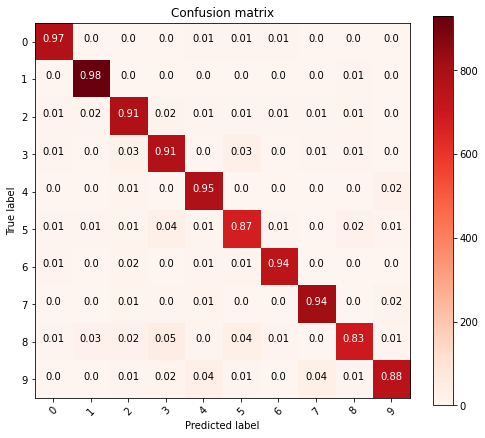

In [ ]:
np.set_printoptions(precision=2)
figl=plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat,classes=[0,1,2,3,4,5,6,7,8,9], title="Confusion matrix")
plt.show()

In [ ]:
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9678571428571429 

[[781   0   3   1   0   1   4   3   3   0]
 [  0 934   4   2   2   0   1   3   0   0]
 [  4   3 828   4   3   1   0  10   3   0]
 [  1   0   8 821   0  11   0  11   3   1]
 [  1   1   2   0 807   1   4   3   1   6]
 [  0   0   1  10   1 745   4   5   6   1]
 [  5   1   2   0   2   2 771   4   0   0]
 [  1   2   6   2   4   0   1 845   0   8]
 [  3   5   9   7   5   7   5   3 787   5]
 [  1   0   1  11   7   2   1  19   2 811]] 



In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred), "\n")
print("Classification Report \n")
print(classification_report(y_test, y_pred))

Accuracy:  0.9678571428571429 

Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       796
           1       0.99      0.99      0.99       946
           2       0.96      0.97      0.96       856
           3       0.96      0.96      0.96       856
           4       0.97      0.98      0.97       826
           5       0.97      0.96      0.97       773
           6       0.97      0.98      0.98       787
           7       0.93      0.97      0.95       869
           8       0.98      0.94      0.96       836
           9       0.97      0.95      0.96       855

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [ ]:
import itertools
def plot_confusion_matrix(cm,classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm=cm.round(2)
    else:
        cm=cm
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
conf_mat=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

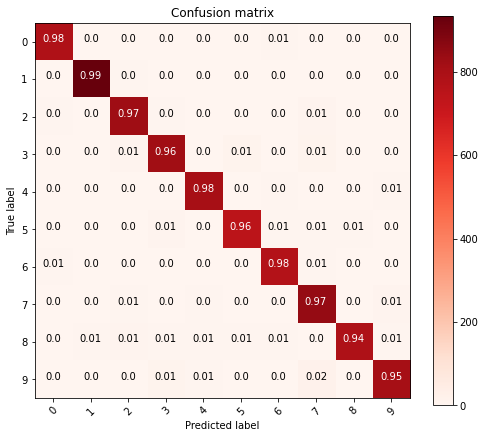

In [ ]:
np.set_printoptions(precision=2)
figl=plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat,classes=[0,1,2,3,4,5,6,7,8,9], title="Confusion matrix")
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred=rf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred), "\n")
print("Classification Report\n")
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Accuracy:  0.9671428571428572 

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       796
           1       0.98      0.98      0.98       946
           2       0.95      0.96      0.96       856
           3       0.96      0.96      0.96       856
           4       0.95      0.99      0.97       826
           5       0.96      0.96      0.96       773
           6       0.97      0.98      0.98       787
           7       0.98      0.97      0.97       869
           8       0.96      0.95      0.95       836
           9       0.97      0.94      0.96       855

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

[[783   0   0   1   2   1   3   0   5   1]
 [  0 930   7   3   2   0   1   2   1   0]
 [  3   2 824   0  10   0   3   6   7   1]
 [  3   1  10 821   0  10   1   2   7   1]
 [  1   1   1 

In [ ]:
import itertools
def plot_confusion_matrix(cm,classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm=cm.round(2)
    else:
        cm=cm
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
conf_matt=metrics.confusion_matrix(y_true=y_test, y_pred=pred)

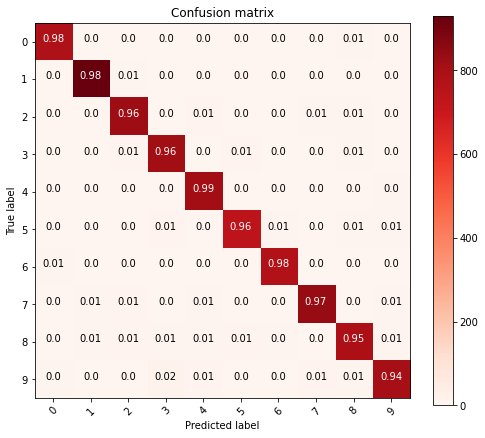

In [ ]:
np.set_printoptions(precision=2)
figl=plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_matt,classes=[0,1,2,3,4,5,6,7,8,9], title="Confusion matrix")
plt.show()

Cross Validation

In [ ]:
score = cross_val_score(rf, X_test,y_test)
print (np.max(score))

0.95
